### RMF Clustering
Estratégia para segmentar cliente

##### Dataset

In [1]:
#pip install pandas

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('../dataframes/uen/df_cliente_setor_veiculo_televisao.csv')


In [4]:
df.head(10)

,Data,Cliente,Setor,Veiculo,VL Tabela,Vl Bruto,Vl Liquido Final,Taxa Ac. TRI % PIB,PMC - Número-índice (2022=100) (Número-índice)/ ES,PMC - Número-índice (2022=100) (Número-índice)/ BR,PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice)/ ES,PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice)/ BR,Ocorrencias do cliente
0,2020-01-31,A. SCHMIDT COMERCIO DE OTICA LTDA ME,LOJA VAREJISTA/ATAC,TV GAZETA NOROESTE,650.00,650.00,520.00,1.1,84.25384,95.01804,87.06581,97.86726,1
1,2020-01-31,A.B. UTILIDADES - EIRELI - EPP,LOJA VAREJISTA/ATAC,TV GAZETA NORTE,21545.00,16238.18,12990.55,1.1,84.25384,95.01804,87.06581,97.86726,1
2,2020-01-31,A.G.S UTILIDADES - EIRELI - EPP,LOJA VAREJISTA/ATAC,TV GAZETA,41205.00,26569.22,21255.38,1.1,84.25384,95.01804,87.06581,97.86726,1
3,2020-01-31,AADM COMERCIO LTDA - EPP,LOJA VAREJISTA/ATAC,TV GAZETA SUL,6644.00,5647.40,4517.92,1.1,84.25384,95.01804,87.06581,97.86726,1
4,2020-01-31,ABC BRINQUEDOS LTDA,LOJA VAREJISTA/ATAC,TV GAZETA NORTE,26269.25,19697.88,15758.30,1.1,84.25384,95.01804,87.06581,97.86726,1
5,2020-01-31,ACAI NA TACA NOVA VENECIA LTDA,TURISMO/HOTEL/GASTRO,TV NOROESTE PRODUCOES,560.00,560.00,560.00,1.1,84.25384,95.01804,87.06581,97.86726,1
6,2020-01-31,ADERICO ANTONIO SCOPEL,LOJA VAREJISTA/ATAC,TV GAZETA NOROESTE,1044.00,990.00,990.00,1.1,84.25384,95.01804,87.06581,97.86726,1
7,2020-01-31,AGORACRED S/A S.C.FINANC E INVESTIMENTO,MERCADO FINANCEIRO,GAZETA PRODUCOES,6000.00,6000.00,4800.00,1.1,84.25384,95.01804,87.06581,97.86726,1
8,2020-01-31,AGORACRED S/A S.C.FINANC E INVESTIMENTO,MERCADO FINANCEIRO,PORTAL G1/GE/HOME,400.00,400.00,320.00,1.1,84.25384,95.01804,87.06581,97.86726,1
9,2020-01-31,AJ ARTIGOS DO VESTUARIO EIRELI - EPP,LOJA VAREJISTA/ATAC,TV GAZETA NORTE,1160.25,1050.00,840.00,1.1,84.25384,95.01804,87.06581,97.86726,1


In [5]:
#To calculate the Recency value, we need to find the last invoice date in our dataset.
df.Data.max()

'2024-06-30'

In [6]:
#Agregar por coluna de cliente e data so.
df.head()

,Data,Cliente,Setor,Veiculo,VL Tabela,Vl Bruto,Vl Liquido Final,Taxa Ac. TRI % PIB,PMC - Número-índice (2022=100) (Número-índice)/ ES,PMC - Número-índice (2022=100) (Número-índice)/ BR,PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice)/ ES,PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice)/ BR,Ocorrencias do cliente
0,2020-01-31,A. SCHMIDT COMERCIO DE OTICA LTDA ME,LOJA VAREJISTA/ATAC,TV GAZETA NOROESTE,650.00,650.00,520.00,1.1,84.25384,95.01804,87.06581,97.86726,1
1,2020-01-31,A.B. UTILIDADES - EIRELI - EPP,LOJA VAREJISTA/ATAC,TV GAZETA NORTE,21545.00,16238.18,12990.55,1.1,84.25384,95.01804,87.06581,97.86726,1
2,2020-01-31,A.G.S UTILIDADES - EIRELI - EPP,LOJA VAREJISTA/ATAC,TV GAZETA,41205.00,26569.22,21255.38,1.1,84.25384,95.01804,87.06581,97.86726,1
3,2020-01-31,AADM COMERCIO LTDA - EPP,LOJA VAREJISTA/ATAC,TV GAZETA SUL,6644.00,5647.40,4517.92,1.1,84.25384,95.01804,87.06581,97.86726,1
4,2020-01-31,ABC BRINQUEDOS LTDA,LOJA VAREJISTA/ATAC,TV GAZETA NORTE,26269.25,19697.88,15758.30,1.1,84.25384,95.01804,87.06581,97.86726,1


In [7]:
# Convertendo a coluna 'Data' para o formato de data, se necessário
#df['Data'] = pd.to_datetime(df['Data'])
#
## Definindo a coluna 'Data' como índice
#df.set_index('Data', inplace=True)

In [8]:
df['Data'] = pd.to_datetime(df['Data'])


In [9]:
df.set_index('Data', inplace=True)


In [10]:
df['Total Ocorrencias Cliente'] = df.groupby('Cliente')['Cliente'].transform('size')

df_cliente = df.groupby([pd.Grouper(freq='ME'), 'Cliente']).agg({
    'Vl Liquido Final': 'sum',
    'Taxa Ac. TRI % PIB': 'mean',
    'Total Ocorrencias Cliente': 'count'
}).reset_index()


In [11]:
df_cliente.shape

(14115, 5)

In [12]:
df_cliente.head()

,Data,Cliente,Vl Liquido Final,Taxa Ac. TRI % PIB,Total Ocorrencias Cliente
0,2020-01-31,A. SCHMIDT COMERCIO DE OTICA LTDA ME,520.00,1.1,1
1,2020-01-31,A.B. UTILIDADES - EIRELI - EPP,12990.55,1.1,1
2,2020-01-31,A.G.S UTILIDADES - EIRELI - EPP,21255.38,1.1,1
3,2020-01-31,AADM COMERCIO LTDA - EPP,4517.92,1.1,1
4,2020-01-31,ABC BRINQUEDOS LTDA,15758.30,1.1,1


In [13]:
df_cliente.Data.max()

Timestamp('2024-06-30 00:00:00')

In [14]:
import datetime as dt


##### RMF Segregate levels

In [15]:
pin_date = dt.datetime(2024, 6, 30)

In [16]:
df_cliente.head()

,Data,Cliente,Vl Liquido Final,Taxa Ac. TRI % PIB,Total Ocorrencias Cliente
0,2020-01-31,A. SCHMIDT COMERCIO DE OTICA LTDA ME,520.00,1.1,1
1,2020-01-31,A.B. UTILIDADES - EIRELI - EPP,12990.55,1.1,1
2,2020-01-31,A.G.S UTILIDADES - EIRELI - EPP,21255.38,1.1,1
3,2020-01-31,AADM COMERCIO LTDA - EPP,4517.92,1.1,1
4,2020-01-31,ABC BRINQUEDOS LTDA,15758.30,1.1,1


In [17]:
rfm = df_cliente.groupby('Cliente').agg({'Data': lambda Data: (pin_date - Data.max()).days,
                                     'Total Ocorrencias Cliente': lambda Invoice: Invoice.nunique(),
                                     'Vl Liquido Final': lambda Amount: Amount.sum()})

In [18]:
rfm.head()

,Data,Total Ocorrencias Cliente,Vl Liquido Final
Cliente,,,
32.605.071 LUIZ GUSTAVO CARDOSO ESTEVAO,213,1,2522.6
34.813.359 APARECIDA DA SILVA THOMAZ ADM,30,1,3750.0
3F SOLUCOES FINANCEIRAS E ENERG. LTDA,274,1,11484.0
3X TELECOMUNICACOES LTDA,608,1,8127.0
48.360.487 NAIARA GAVA,366,1,2349.2


In [19]:
rfm.columns = ['recency', 'frequency', 'monetary']
rfm = rfm[rfm["monetary"] > 0]
rfm.head()

,recency,frequency,monetary
Cliente,,,
32.605.071 LUIZ GUSTAVO CARDOSO ESTEVAO,213,1,2522.6
34.813.359 APARECIDA DA SILVA THOMAZ ADM,30,1,3750.0
3F SOLUCOES FINANCEIRAS E ENERG. LTDA,274,1,11484.0
3X TELECOMUNICACOES LTDA,608,1,8127.0
48.360.487 NAIARA GAVA,366,1,2349.2


In [20]:
rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])


rfm["frequency_score"] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

rfm["monetary_score"] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

rfm['score']=rfm['recency_score'].astype(int)+rfm['frequency_score'].astype(int)+rfm['monetary_score'].astype(int)

In [21]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,score
Cliente,,,,,,,
32.605.071 LUIZ GUSTAVO CARDOSO ESTEVAO,213,1,2522.6,4,1,1,6
34.813.359 APARECIDA DA SILVA THOMAZ ADM,30,1,3750.0,5,1,1,7
3F SOLUCOES FINANCEIRAS E ENERG. LTDA,274,1,11484.0,4,1,3,8
3X TELECOMUNICACOES LTDA,608,1,8127.0,3,1,2,6
48.360.487 NAIARA GAVA,366,1,2349.2,4,1,1,6


In [22]:
rfm[rfm['score']== 15].sort_values('monetary', ascending=False).head()


,recency,frequency,monetary,recency_score,frequency_score,monetary_score,score
Cliente,,,,,,,
REALMAR DISTRIBUIDORA LTDA,0,5,23786193.97,5,5,5,15
SUPERINTENDENCIA ESTADUAL DE COMUNICACAO,0,4,15673673.45,5,5,5,15
SUPERMERCADOS CASAGRANDE LTDA,0,4,11515921.50,5,5,5,15
LOJAS SIPOLATTI COMERCIO E SERVICOS LTDA,0,6,11377416.93,5,5,5,15
LOJAS SIMONETTI LTDA,0,4,6660632.10,5,5,5,15


In [23]:
rfm[rfm['score']==15].count()
#There are 148 best clients in the company who are frequent buyers, and also generate high revenue

recency            144
frequency          144
monetary           144
recency_score      144
frequency_score    144
monetary_score     144
score              144
dtype: int64

In [24]:
def rfm_level(score):
    if  ((score >1) and (score < 4)):
        return 'Inactive'
    elif ((score >3) and (score < 8)):
        return 'Average'
    elif ((score > 7) and (score <11)):
        return 'Good'
    else:
        return 'Active'

In [25]:
rfm['level'] = rfm['score'].apply(lambda score : rfm_level(score))
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,score,level
Cliente,,,,,,,,
32.605.071 LUIZ GUSTAVO CARDOSO ESTEVAO,213,1,2522.6,4,1,1,6,Average
34.813.359 APARECIDA DA SILVA THOMAZ ADM,30,1,3750.0,5,1,1,7,Average
3F SOLUCOES FINANCEIRAS E ENERG. LTDA,274,1,11484.0,4,1,3,8,Good
3X TELECOMUNICACOES LTDA,608,1,8127.0,3,1,2,6,Average
48.360.487 NAIARA GAVA,366,1,2349.2,4,1,1,6,Average


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

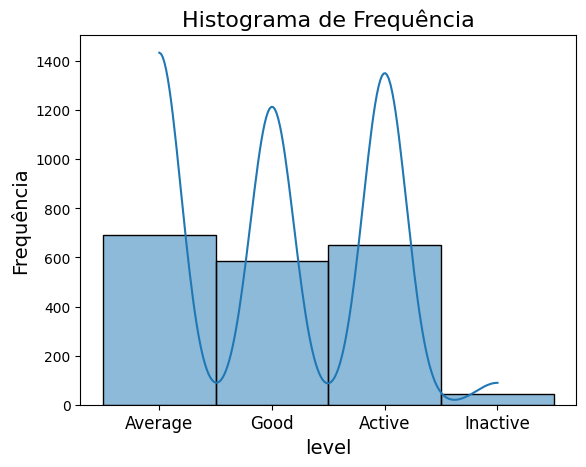

In [27]:
sns.histplot(rfm['level'], bins=30, kde=True)
sns.set_context("notebook", font_scale=1.5)
plt.title('Histograma de Frequência', fontsize = 16)
plt.xlabel('level',fontsize = 14)
plt.ylabel('Frequência',fontsize = 14)

plt.xticks(fontsize=12)  # Tamanho da fonte dos números no eixo X
plt.yticks(fontsize=10)  # Tamanho da fonte das strings no eixo Y

plt.show()

In [28]:
rfm.groupby('level').agg({
    'recency' : ['mean', 'min','max'],
    'frequency' : ['mean', 'min','max'],
    'monetary' : ['mean','min','max','count']
})

recency             frequency               monetary          \
                 mean   min   max      mean min max           mean     min   
level                                                                        
Active     209.351767     0  1399  2.211982   1   7  435484.607174  4811.4   
Average    959.863965     0  1612  1.004342   1   2    7352.672098    12.9   
Good       538.981197     0  1583  1.141880   1   3   26791.312838   460.8   
Inactive  1346.534884  1065  1612  1.000000   1   1    2324.805349   400.0   

                             
                  max count  
level                        
Active    23786193.97   651  
Average     135507.03   691  
Good        582436.51   585  
Inactive      4000.00    43

Active Customers
We can say that 745 customers bought 62.407,57 units by shopping 2.10 times approximately every 218.81 days.

They are previliged customers.

Surprise offers can be given on birthdays and anniversary.

Good Customers
We can say that 751 customers bought 7507.89 units by shopping 1.17 times approximately every 545.52 days.

Avarage Customers
We can say that 786 customers bought 2467.45 units by shopping 1.00 times approximately every 980.41 days.
Tiered pricing of products can be introduced.


Inactive Customers
We can say that 27 customers bought 699.10 units by shopping 1.00 times approximately every 1357.92 days

Personalised emails and SMS can be sent to the customers regarding the offers.
More marketing strategies can be introduced to improve the frequency of orders.

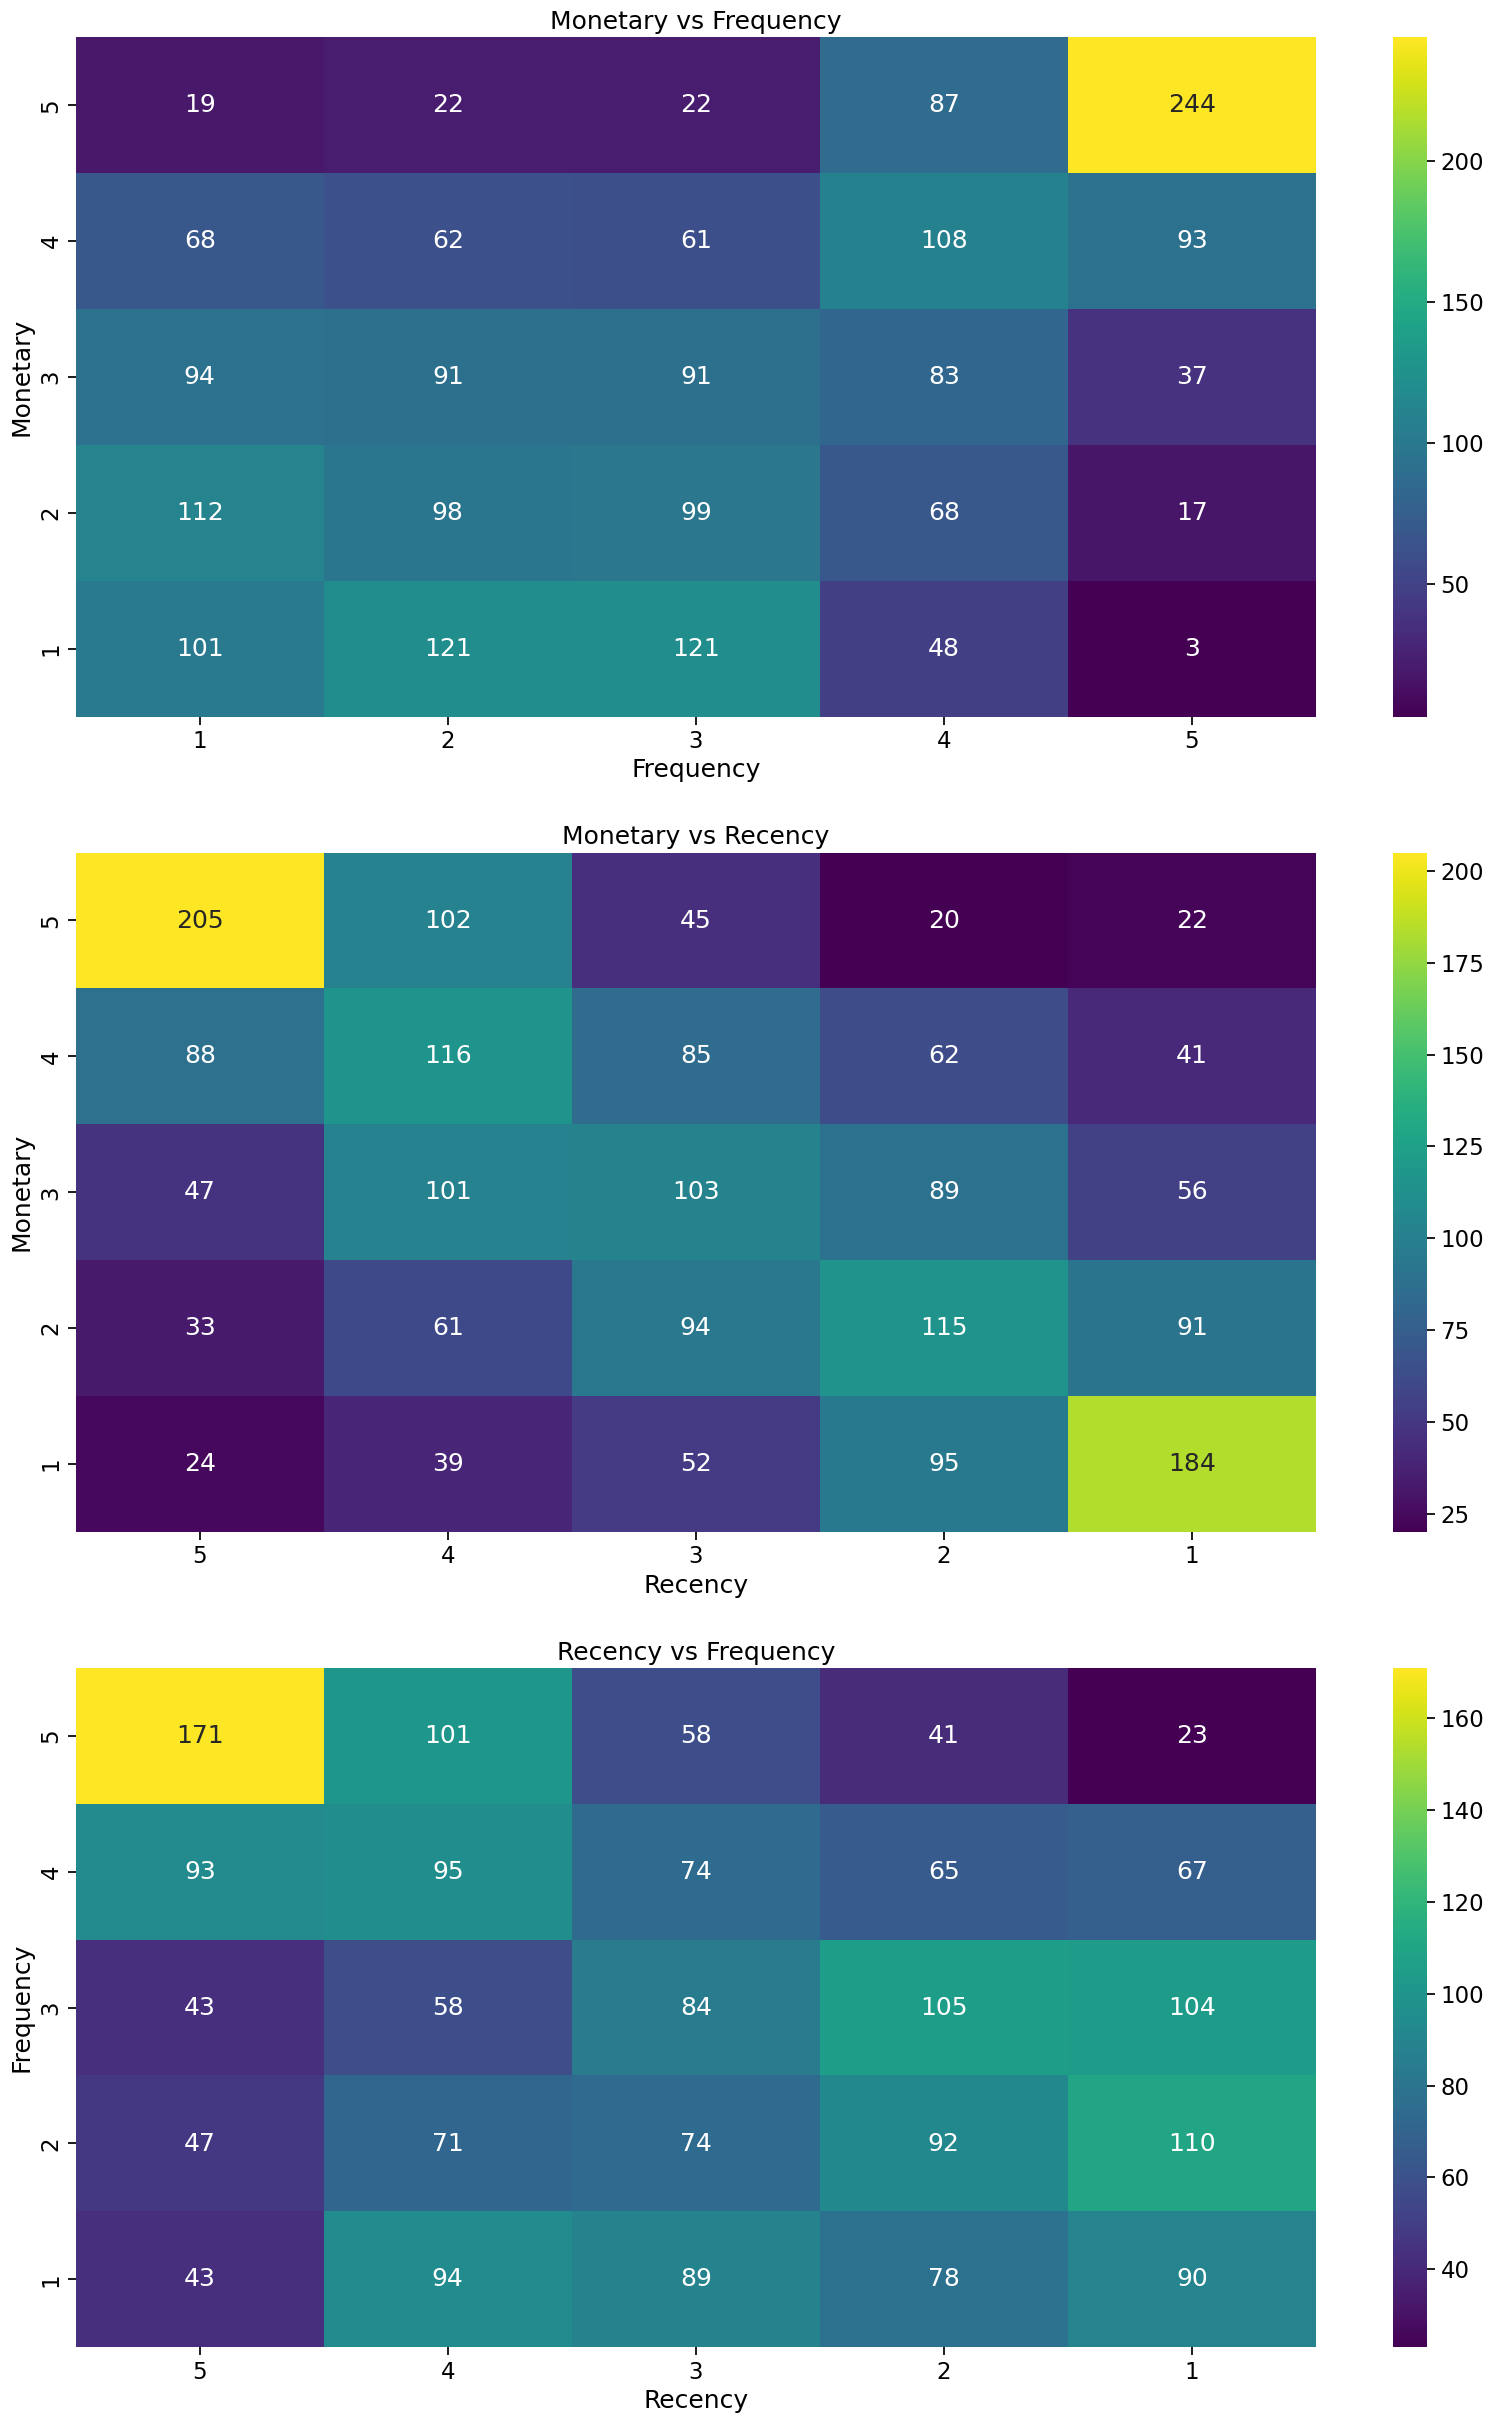

In [29]:
cross_table1 = pd.crosstab(index=rfm['monetary_score'], columns=rfm['frequency_score'])
cross_table2 = pd.crosstab(index=rfm['monetary_score'], columns=rfm['recency_score'])
cross_table3 = pd.crosstab(index=rfm['frequency_score'], columns=rfm['recency_score'])
plt.figure(figsize=(20,30))
plt.subplot(311)
ax1 = sns.heatmap(cross_table1, cmap='viridis', annot=True, fmt=".0f")
ax1.invert_yaxis()
ax1.set_ylabel('Monetary')
ax1.set_xlabel('Frequency')
ax1.set_title('Monetary vs Frequency')
plt.subplot(312)
ax2 = sns.heatmap(cross_table2, cmap='viridis', annot=True, fmt=".0f")
ax2.invert_yaxis()
ax2.set_ylabel('Monetary')
ax2.set_xlabel('Recency')
ax2.set_title('Monetary vs Recency')
plt.subplot(313)
ax3 = sns.heatmap(cross_table3, cmap='viridis', annot=True, fmt=".0f")
ax3.invert_yaxis()
ax3.set_ylabel('Frequency')
ax3.set_xlabel('Recency')
ax3.set_title('Recency vs Frequency')
plt.show()

##### RMF Clustering

In [30]:
rfm.describe()

,recency,frequency,monetary,score
count,1970.000000,1970.000000,1.970000e+03,1970.000000
mean,595.309137,1.444162,1.544944e+05,9.021320
std,477.500584,0.867668,8.955570e+05,3.322447
min,0.000000,1.000000,1.290000e+01,3.000000
25%,182.000000,1.000000,5.160960e+03,6.000000
50%,547.000000,1.000000,1.540262e+04,9.000000
75%,943.000000,2.000000,5.189925e+04,12.000000
max,1612.000000,7.000000,2.378619e+07,15.000000


In [31]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,score,level
Cliente,,,,,,,,
32.605.071 LUIZ GUSTAVO CARDOSO ESTEVAO,213,1,2522.6,4,1,1,6,Average
34.813.359 APARECIDA DA SILVA THOMAZ ADM,30,1,3750.0,5,1,1,7,Average
3F SOLUCOES FINANCEIRAS E ENERG. LTDA,274,1,11484.0,4,1,3,8,Good
3X TELECOMUNICACOES LTDA,608,1,8127.0,3,1,2,6,Average
48.360.487 NAIARA GAVA,366,1,2349.2,4,1,1,6,Average


In [32]:
pip install scikit-learn yellowbrick


Note: you may need to restart the kernel to use updated packages.


In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
rfm_standard_scaler=rfm[['recency','frequency','monetary']]
scaler = StandardScaler()
x_scaled=scaler.fit(rfm_standard_scaler)
x_scaled = scaler.fit_transform(rfm_standard_scaler)
x_scaled

array([[-0.80084972, -0.51203354, -0.16973842],
       [-1.18419263, -0.51203354, -0.16836753],
       [-0.67306874, -0.51203354, -0.15972937],
       ...,
       [ 0.34708425, -0.51203354, -0.16317391],
       [-0.86578759, -0.51203354, -0.14364254],
       [ 1.42798558, -0.51203354, -0.16534966]])

In [35]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [36]:
pip install distutils

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement distutils (from versions: none)
ERROR: No matching distribution found for distutils


In [37]:
pip install setuptools


Note: you may need to restart the kernel to use updated packages.


In [38]:
pip install distutils

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement distutils (from versions: none)
ERROR: No matching distribution found for distutils


In [39]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

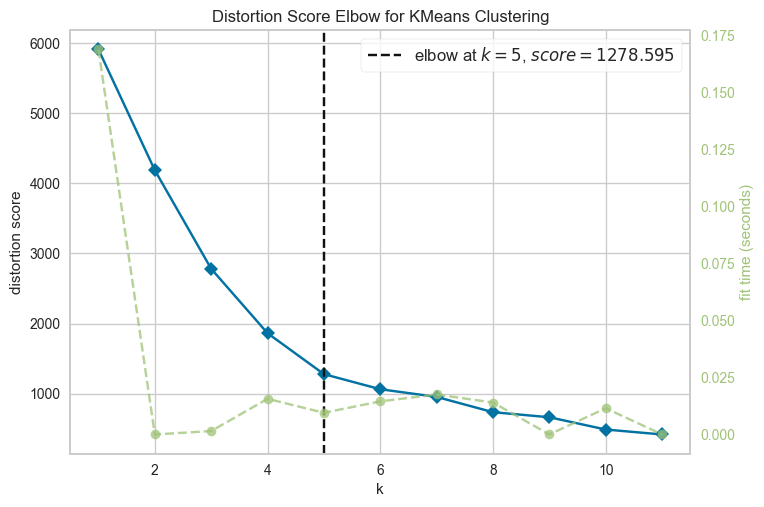

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [40]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(x_scaled)  
visualizer.show()  

[1 1 1 ... 1 1 1]
 Our cluster centers are as follows
[[ 1.08567896 -0.39997641 -0.15321199]
 [-0.64059189 -0.12195331 -0.09050469]
 [-1.19592334  4.3297556  16.40122331]
 [-0.89651088  1.98571483  4.9244631 ]
 [-0.83931202  2.66619115  0.48414234]]


,recency,frequency,monetary
cluster_pred,,,
0,751,751,751
1,1058,1058,1058
2,5,5,5
3,12,12,12
4,144,144,144


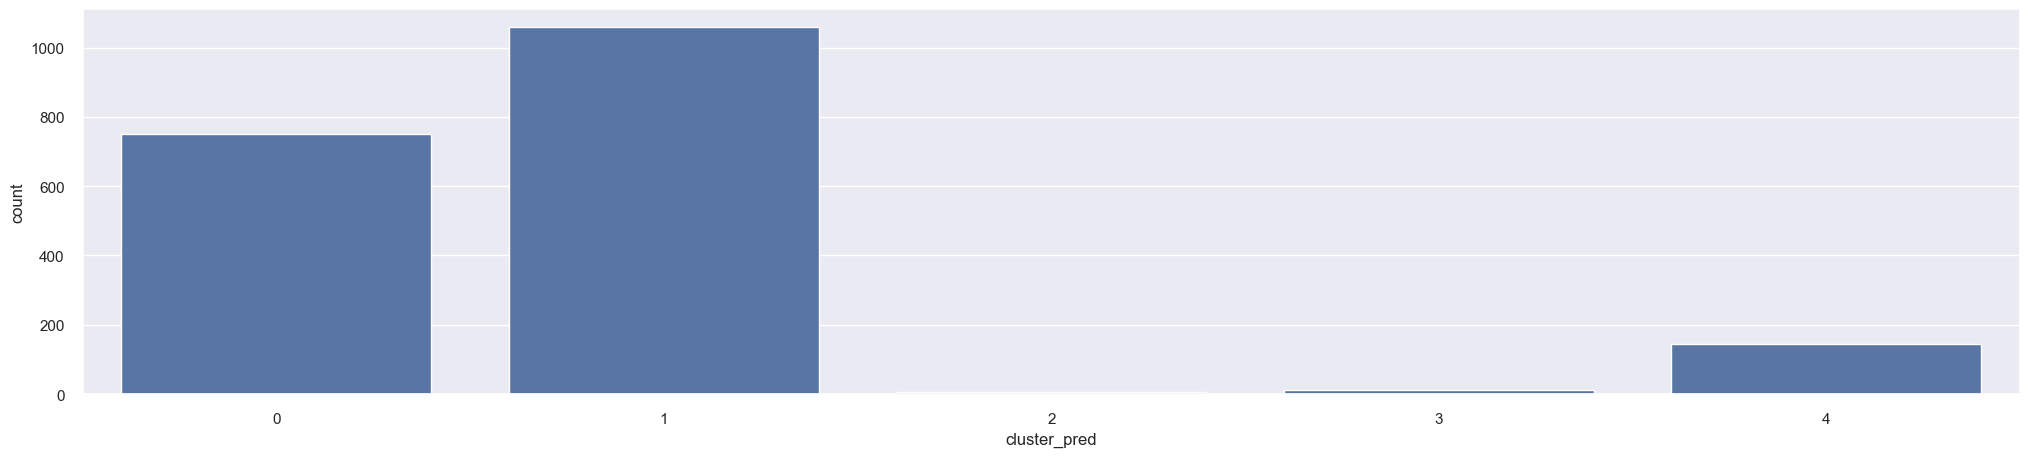

In [41]:
kmeans_scaled = KMeans(5)
kmeans_scaled.fit(x_scaled)
identified_clusters = kmeans_scaled.fit_predict(rfm_standard_scaler)
clusters_scaled = rfm_standard_scaler.copy()
clusters_scaled['cluster_pred']=kmeans_scaled.fit_predict(x_scaled)
print(identified_clusters)
sns.set(style="darkgrid")
print(" Our cluster centers are as follows")
print(kmeans_scaled.cluster_centers_)
f, ax = plt.subplots(figsize=(25, 5))
ax = sns.countplot(x="cluster_pred", data=clusters_scaled)
clusters_scaled.groupby(['cluster_pred']).count()

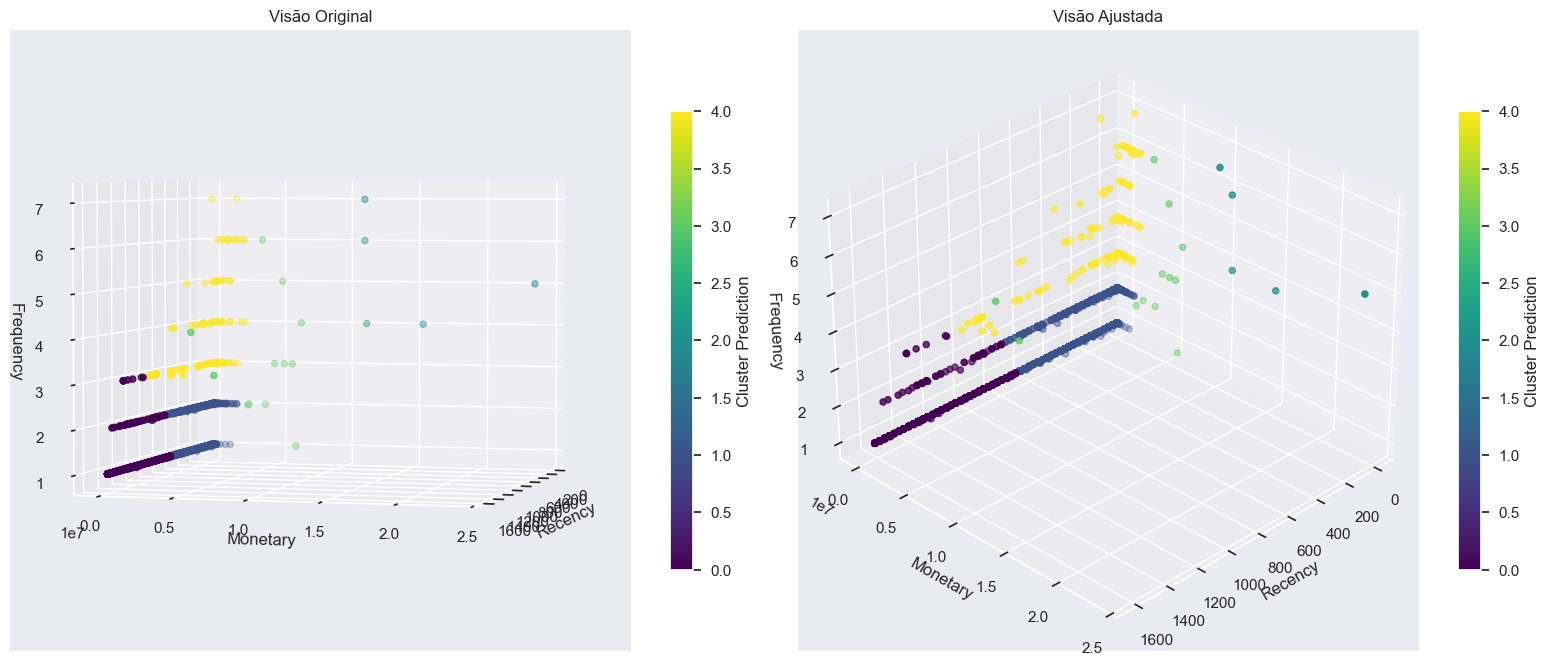

In [42]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

# Cria a figura e os subplots, com 1 linha e 2 colunas
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(16, 8))

# Dados dos eixos
xline = clusters_scaled['recency']
yline = clusters_scaled['frequency']
zline = clusters_scaled['monetary']

# Gráfico 1 (idêntico ao original)
scatter1 = ax1.scatter3D(xline, zline, yline, c=clusters_scaled['cluster_pred'], cmap='viridis')
ax1.set_xlabel('Recency')
ax1.set_ylabel('Monetary')
ax1.set_zlabel('Frequency')
ax1.view_init(3, 15)  # Manter o ângulo de visão original
ax1.set_title('Visão Original')

# Gráfico 2 (com ângulo de visão alterado)
scatter2 = ax2.scatter3D(xline, zline, yline, c=clusters_scaled['cluster_pred'], cmap='viridis')
ax2.set_xlabel('Recency')
ax2.set_ylabel('Monetary')
ax2.set_zlabel('Frequency')
ax2.view_init(30, 45)  # Ângulo de visão ajustado para melhor visualização
ax2.set_title('Visão Ajustada')

# Adicionar barras de cores
cbar1 = fig.colorbar(scatter1, ax=ax1, shrink=0.6)
cbar1.set_label('Cluster Prediction')

cbar2 = fig.colorbar(scatter2, ax=ax2, shrink=0.6)
cbar2.set_label('Cluster Prediction')

# Ajustar layout e mostrar o gráfico
plt.tight_layout()
plt.show()


In [43]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(x_scaled, identified_clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5512985697291837


In [44]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(x_scaled, identified_clusters)
print(f"Davies-Bouldin Index: {davies_bouldin}")

Davies-Bouldin Index: 0.6730204279083325


In [45]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(x_scaled, identified_clusters)
print(f"Calinski-Harabasz Index: {calinski_harabasz}")

Calinski-Harabasz Index: 370.2469236332506


In [46]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [47]:
rfm_standard_scaler['cluster']= clusters_scaled['cluster_pred']
rfm_standard_scaler['level']=rfm['level']

rfm_standard_scaler.groupby('cluster').agg({
    'recency' : ['mean','min','max'],
    'frequency' : ['mean','min','max'],
    'monetary' : ['mean','min','max','count']
})

C:\Users\Raul\AppData\Local\Temp\ipykernel_22224\2934273416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_standard_scaler['cluster']= clusters_scaled['cluster_pred']
C:\Users\Raul\AppData\Local\Temp\ipykernel_22224\2934273416.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_standard_scaler['level']=rfm['level']


recency            frequency              monetary               \
                mean  min   max      mean min max          mean          min   
cluster                                                                        
0        1113.589880  700  1612  1.097204   1   3  1.731921e+04        12.90   
1         289.503781    0   761  1.338374   1   2  7.346291e+04       228.96   
2          24.400000    0   122  5.200000   4   7  1.483900e+07  11377416.93   
3         167.333333    0  1004  3.166667   1   6  4.563512e+06   2714650.48   
4         194.638889    0  1065  3.756944   3   7  5.879614e+05      9600.00   

                            
                 max count  
cluster                     
0          610582.78   751  
1         1806883.43  1058  
2        23786193.97     5  
3         6660632.10    12  
4         2443724.20   144

##### K means analisys

In [48]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,score,level
Cliente,,,,,,,,
32.605.071 LUIZ GUSTAVO CARDOSO ESTEVAO,213,1,2522.6,4,1,1,6,Average
34.813.359 APARECIDA DA SILVA THOMAZ ADM,30,1,3750.0,5,1,1,7,Average
3F SOLUCOES FINANCEIRAS E ENERG. LTDA,274,1,11484.0,4,1,3,8,Good
3X TELECOMUNICACOES LTDA,608,1,8127.0,3,1,2,6,Average
48.360.487 NAIARA GAVA,366,1,2349.2,4,1,1,6,Average


In [49]:
rfm_standard_scaler.head()

,recency,frequency,monetary,cluster,level
Cliente,,,,,
32.605.071 LUIZ GUSTAVO CARDOSO ESTEVAO,213,1,2522.6,1,Average
34.813.359 APARECIDA DA SILVA THOMAZ ADM,30,1,3750.0,1,Average
3F SOLUCOES FINANCEIRAS E ENERG. LTDA,274,1,11484.0,1,Good
3X TELECOMUNICACOES LTDA,608,1,8127.0,1,Average
48.360.487 NAIARA GAVA,366,1,2349.2,1,Average


In [50]:
rfm_standard_scaler.shape

(1970, 5)

##### Juntando na tabela original

In [51]:
rfm_standard_scaler = rfm_standard_scaler.reset_index().rename(columns={'index': 'Cliente'})


In [52]:
rfm_standard_scaler.head()

,Cliente,recency,frequency,monetary,cluster,level
0,32.605.071 LUIZ GUSTAVO CARDOSO ESTEVAO,213,1,2522.6,1,Average
1,34.813.359 APARECIDA DA SILVA THOMAZ ADM,30,1,3750.0,1,Average
2,3F SOLUCOES FINANCEIRAS E ENERG. LTDA,274,1,11484.0,1,Good
3,3X TELECOMUNICACOES LTDA,608,1,8127.0,1,Average
4,48.360.487 NAIARA GAVA,366,1,2349.2,1,Average


In [53]:
df_combinado = df.merge(rfm_standard_scaler[['Cliente', 'cluster']], on='Cliente', how='left')
df_combinado.sample(10)

,Cliente,Setor,Veiculo,VL Tabela,Vl Bruto,Vl Liquido Final,Taxa Ac. TRI % PIB,PMC - Número-índice (2022=100) (Número-índice)/ ES,PMC - Número-índice (2022=100) (Número-índice)/ BR,PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice)/ ES,PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice)/ BR,Ocorrencias do cliente,Total Ocorrencias Cliente,cluster
22116,FARMACIA PRECISA LTDA - EPP,LOJA VAREJISTA/ATAC,PORTAL G1/GE/HOME,400.0,400.00,320.00,2.5,NaN,NaN,NaN,NaN,1,65,1
2899,JM PISCINAS LTDA - EPP,LOJA VAREJISTA/ATAC,TV GAZETA NORTE,4000.0,4000.00,3200.00,-3.3,99.50737,105.88980,96.57693,104.42429,1,1,0
14004,SERVICO NAC.DE APRENDIZAGEM INDUSTRIAL,PREST DE SERVICOS,TV GAZETA NORTE,1995.0,1895.24,1516.19,3.0,107.07966,106.66694,101.22120,100.52686,1,43,4
18593,MULTIACO PRODUTOS SIDERURGICOS EIRELI EP,LOJA VAREJISTA/ATAC,TV GAZETA NORTE,4434.0,2793.44,2793.44,3.1,99.14880,100.19568,100.43630,102.80546,1,64,1
6554,CALCADOS ITAPUA S/A - CISA,LOJA VAREJISTA/ATAC,TV GAZETA,38109.0,19054.50,15243.60,4.3,94.67496,98.09983,96.32203,99.16459,1,34,4
7201,JACYMAR ZOCCA,PREST DE SERVICOS,TV GAZETA NOROESTE,1767.0,1212.53,1212.53,4.3,94.60695,94.04461,97.03811,97.79176,1,6,0
4587,SHOW DISTRIB. LOGISTICA TRANSPORTES LTDA,LOJA VAREJISTA/ATAC,TV GAZETA SUL,12966.0,10956.27,8765.02,-2.9,82.42783,87.09135,92.31967,98.71772,1,90,4
17830,ASSOCIACAO FESTA DA CAPPITELLA - AFECAP,PREST DE SERVICOS,TV GAZETA NOROESTE,42946.5,30000.00,30000.00,3.1,105.32361,102.12442,103.33135,102.15386,1,1,1
12316,HOSPITAL INFANTIL FRANCISCO DE ASSIS,PREST DE SERVICOS,TV GAZETA SUL,4040.0,3636.40,2909.12,2.7,100.45653,99.62940,99.18731,99.77290,1,27,1
15645,MBO CARGO TRANSPORTES INTERNACIONAIS LTD,TRANSPORTES,TV GAZETA NORTE,1520.0,912.00,729.60,3.7,106.02377,100.27768,106.17224,101.85801,1,27,4


In [54]:
df_combinado['cluster'].value_counts()

cluster
1    10207
4     7444
0     2498
2     1249
3      965
Name: count, dtype: int64